## Import the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
data = pd.read_csv("EastWestAirlines.csv")
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## Normalizing the data

In [4]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
data_norm = pd.DataFrame(MM.fit_transform(data.iloc[:, 1:]))
data_norm.columns = list(data.iloc[:, 1:])

In [5]:
data_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


## Identifying the number of clusters

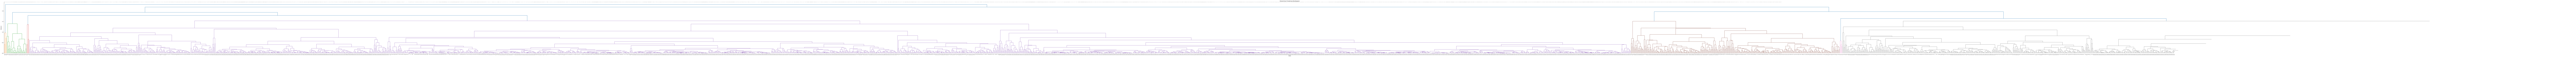

In [19]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(data_norm, method="complete",metric="euclidean")
plt.figure(figsize=(500, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()     

## Fitting the model

In [20]:
## Identifying the number of clusters## Fitting the modelfrom sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=7, linkage='complete',affinity = "euclidean").fit(data_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
data['clust']=cluster_labels # creating a  new column and assigning it to new column 
data  

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [21]:
data.iloc[:,1:].groupby(data.clust).mean()   

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,
0,59961.123244,88.551987,1.712967,1.000401,1.006022,10170.362505,9.095143,227.239663,0.653553,3824.722601,0.000000,0.0
1,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000,1.0
2,79918.920175,218.528947,2.098246,1.009649,1.000877,16823.058772,13.392982,740.800877,2.239474,4298.630702,1.000000,2.0
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000,3.0
4,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548,4.0
5,64521.000000,295.500000,1.250000,1.000000,4.250000,73273.750000,15.750000,575.000000,2.250000,4242.750000,0.500000,5.0
6,152861.250000,8804.750000,4.000000,1.000000,1.000000,33927.500000,19.000000,500.000000,1.500000,5944.000000,1.000000,6.0


In [22]:
clust1 = data[(data.clust==1)]
clust1  

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,1
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,1
16,17,51890,0,4,1,1,48963,16,0,0,6910,1,1
20,21,120576,0,5,1,1,58831,23,250,2,6896,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3753,3776,70178,0,5,1,1,61530,12,1300,6,3306,1,1
3772,3795,822321,0,5,1,1,138334,26,600,2,3288,1,1
3846,3869,97510,1678,5,1,1,71609,51,7650,26,1665,1,1
3855,3878,190730,0,5,1,1,78916,28,2450,9,1648,1,1


In [23]:
clust0 = data[(data.clust==0)]
clust0   

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,0
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,0
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [24]:
clust3 = data[(data.clust==3)]
clust3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1,3
3235,3257,287033,0,1,1,1,26161,58,12873,53,2272,1,3
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,3
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1,3


In [25]:
clust4 = data[(data.clust==4)]
clust4

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
198,202,8669,0,1,3,1,11397,16,0,0,7486,1,4
381,386,167670,0,1,3,1,15907,13,0,0,6994,0,4
794,804,55610,0,1,2,1,5095,13,0,0,6151,0,4
940,951,44824,0,1,3,1,21107,19,2000,4,5916,1,4
1149,1161,84856,0,1,2,1,6894,13,0,0,5547,0,4
1270,1283,16103,0,1,3,1,10819,13,0,0,5427,0,4
1389,1403,49145,0,1,2,1,12755,22,2450,7,5323,0,4
1527,1542,23965,0,1,2,1,7308,16,550,3,5003,0,4
1541,1556,36887,0,1,2,1,9048,11,0,0,4951,0,4
1791,1808,32510,0,1,3,1,14568,13,0,0,4341,0,4


In [26]:
clust2 = data[(data.clust==2)]
clust2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,2
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,2
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,2
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,2
18,19,91473,0,3,1,1,27408,17,0,0,6903,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,2
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,2
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2


## Performing clustering again with Standardized data

## Standardization of the data

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_ss = pd.DataFrame(scaler.fit_transform(data.iloc[:,1:]))
data_ss.columns = list(data.iloc[:,1:])

## Identifying the optimal number of clusters and fitting

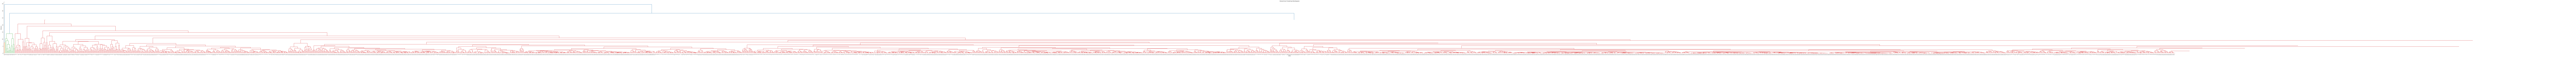

In [30]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(data_ss, method="complete",metric="euclidean")
plt.figure(figsize=(500, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()    ## Identifying the optimal number of clusters and fitting

In [31]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=3, linkage='complete',affinity = "euclidean").fit(data_ss) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
data['clust']=cluster_labels # creating a  new column and assigning it to new column 
data  

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [32]:
data.iloc[:,1:].groupby(data.clust).mean()   

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,
0,73341.899046,144.08438,2.053993,1.014566,1.000753,16825.884480,11.507785,446.822200,1.34882,4117.455299,0.369412,0.0
1,106673.000000,694.00000,2.500000,1.000000,1.000000,76325.000000,75.500000,26458.500000,49.00000,2602.000000,1.000000,1.0
2,138061.400000,78.80000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.60000,4613.866667,0.533333,2.0


In [33]:
clust1 = data[(data.clust==1)]
clust1 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1,1
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,1


In [34]:
clust0 = data[(data.clust==0)]
clust0  

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


#### Normalization of the data gave some improved results when compared with Standardization. The clustering with the Standardization of the data is not so accurate in making the hierarchies.

#### Also for the number of clusters, we can go with 8 or 4 depending on the precision of the clustering we need. And among the different linkage methods, the 'complete' linkage method gave the best grouped clusters. The 'single' method gave very poorly grouped clusters